## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import os
import re
import matplotlib.pyplot as plt
import string
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import en_core_web_sm
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

nlp = en_core_web_sm.load()

C:\Users\YL\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [2]:
df = pd.read_csv('winemag-data_first150k.csv')

In [3]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
#Files size too big, takes too long to run, hence we shorten the row first
df = df.iloc[1:1000]
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Portugal,"This is a dry sparkling wine with tannins, spi...",Plexus Tinto,85,7.0,Tejo,NaN,NaN,Alicante Bouschet,Adega Cooperativa do Cartaxo
996,996,Portugal,"This is a soft, creamy wine with fruitiness an...",Blanc de Blancs Bruto,85,12.0,Beira Atlantico,NaN,NaN,Portuguese Sparkling,Adega de Cantanhede
997,997,France,This is a soft wine whose herbal character is ...,La Galope,85,15.0,Southwest France,Côtes de Gascogne,NaN,Sauvignon Blanc,Domaine de l'Herré
998,998,France,This white wine is fruity and crisp with a del...,NaN,85,9.0,Southwest France,Côtes de Gascogne,NaN,White Blend,Domaine du Touja


## Data Preprocessing + EDA

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

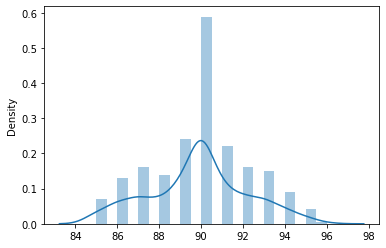

In [5]:
sns.distplot(df,x=df['points'])

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

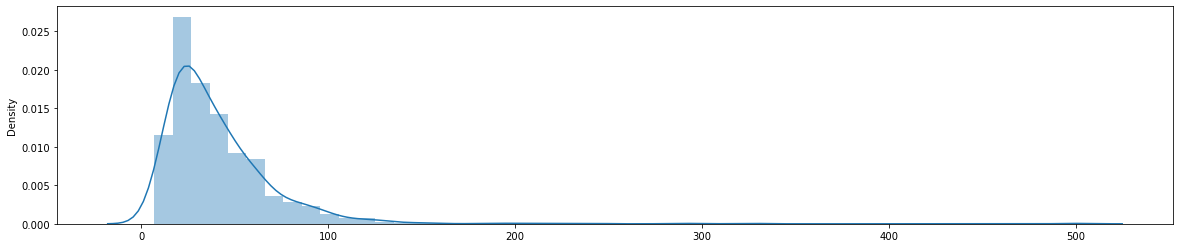

In [6]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df,x=df['price'],ax=ax)

In [7]:
df['price'].describe()

count    954.000000
mean      41.099581
std       32.768730
min        7.000000
25%       22.000000
50%       32.500000
75%       50.000000
max      500.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='country'>

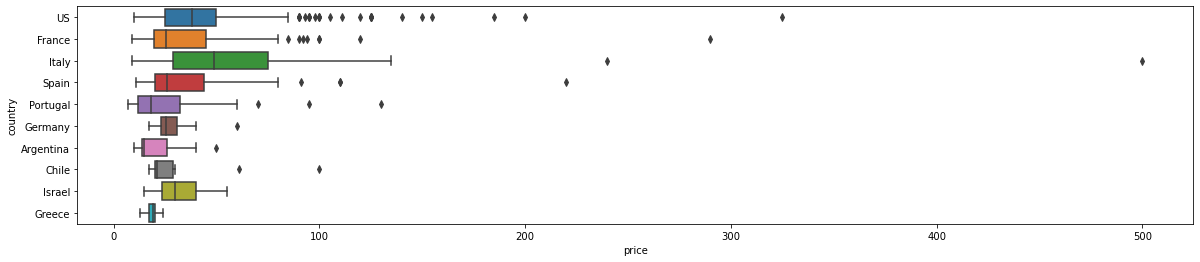

In [8]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="price", y='country',data=df,order=df.country.value_counts().iloc[:10].index,ax=ax)

## Categorising wine based on score

In [9]:
def cat(x):
    if  x < 85 :
        return "1"
    if x < 90 and x >= 85:
        return "2"
    if x < 95 and x>= 90:
        return "3"
    if x>=95:
        return "4"


df['category'] = df['points'].apply(lambda x: cat(x))

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


<AxesSubplot:xlabel='price', ylabel='category'>

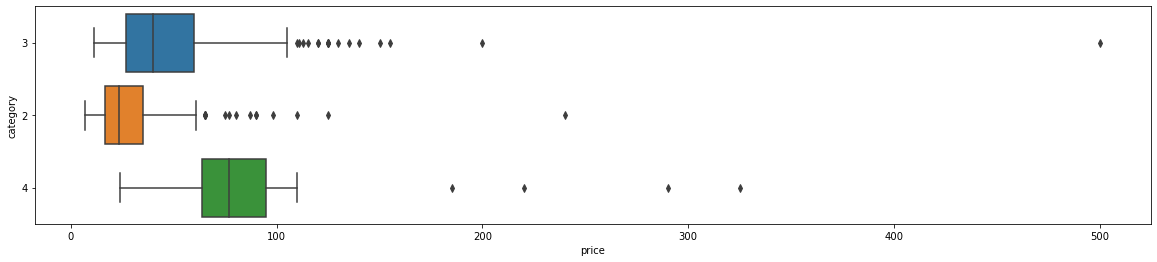

In [10]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="price", y='category',data=df,order=df.category.value_counts().iloc[:10].index,ax=ax)

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

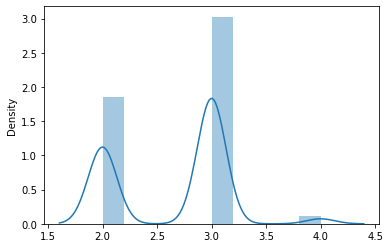

In [11]:
sns.distplot(df,x=df['category'])

In [12]:
words=[]
for i in df['description']:
    new_text=i.split(" ")
    for i in new_text:
        words.append(i)


In [13]:
from nltk import FreqDist

count_words=FreqDist(words)

In [14]:
count_words

FreqDist({'and': 2799, 'of': 1440, 'the': 1316, 'a': 1201, 'with': 823, 'is': 708, 'this': 626, 'in': 531, 'wine': 475, 'The': 427, ...})

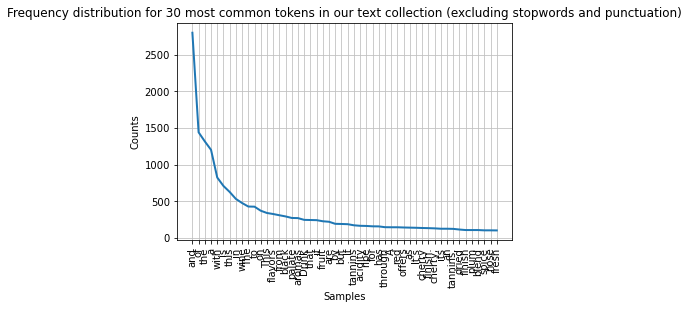

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [15]:
count_words.plot(50,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

## Initial Wordcloud findings

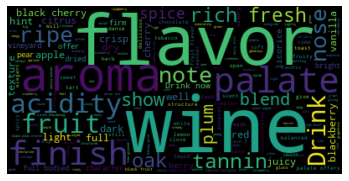

In [16]:
from wordcloud import WordCloud

text = " ".join(review for review in df.description)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
df_cat1=df[df['category'] == '1']
df_cat2=df[df['category'] == '2']
df_cat3=df[df['category'] == '3']
df_cat4=df[df['category'] == '4']

In [18]:
def plot_common_words(data):
    words=[]
    for i in data['description']:
        new_text=i.split(" ")
        for i in new_text:
            words.append(i)
    count_words=FreqDist(words)
    return count_words.most_common(20)

In [19]:
plot_common_words(df_cat1)

[]

In [20]:
plot_common_words(df_cat2)

[('and', 977),
 ('of', 482),
 ('the', 464),
 ('a', 400),
 ('with', 298),
 ('is', 265),
 ('this', 202),
 ('wine', 183),
 ('This', 154),
 ('to', 148),
 ('on', 144),
 ('in', 140),
 ('flavors', 139),
 ('The', 129),
 ('aromas', 114),
 ('black', 99),
 ('from', 96),
 ('palate', 88),
 ('fruit', 86),
 ('it', 85)]

In [21]:
plot_common_words(df_cat3)

[('and', 1740),
 ('of', 918),
 ('the', 815),
 ('a', 773),
 ('with', 505),
 ('is', 418),
 ('this', 397),
 ('in', 377),
 ('The', 291),
 ('wine', 278),
 ('to', 271),
 ('on', 216),
 ('from', 200),
 ('black', 187),
 ('palate', 179),
 ('This', 174),
 ('flavors', 172),
 ('Drink', 161),
 ('that', 161),
 ('aromas', 147)]

In [22]:
plot_common_words(df_cat4)

[('and', 82),
 ('of', 40),
 ('the', 37),
 ('a', 28),
 ('this', 27),
 ('is', 25),
 ('with', 20),
 ('flavors', 14),
 ('through', 14),
 ('wine', 14),
 ('in', 14),
 ('Drink', 13),
 ('from', 12),
 ('are', 11),
 ('This', 11),
 ('on', 10),
 ('it', 9),
 ('aromas', 8),
 ('for', 8),
 ('finish', 7)]

## No. of wines by country

<AxesSubplot:xlabel='country', ylabel='count'>

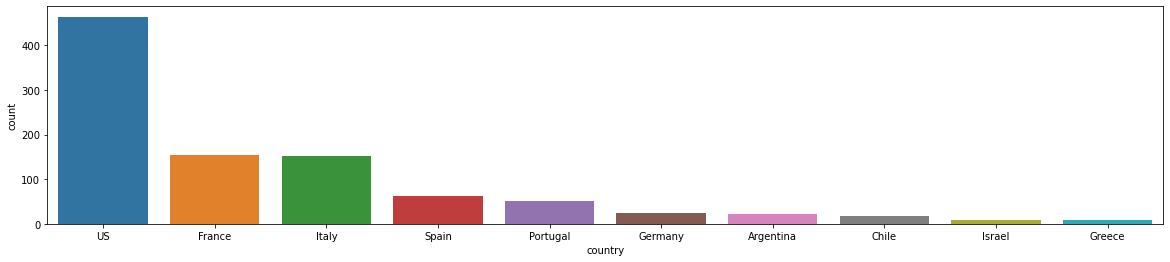

In [23]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="country", data=df,order=df.country.value_counts().iloc[:10].index,ax=ax)

## Top varieties of wine 

<AxesSubplot:xlabel='variety', ylabel='count'>

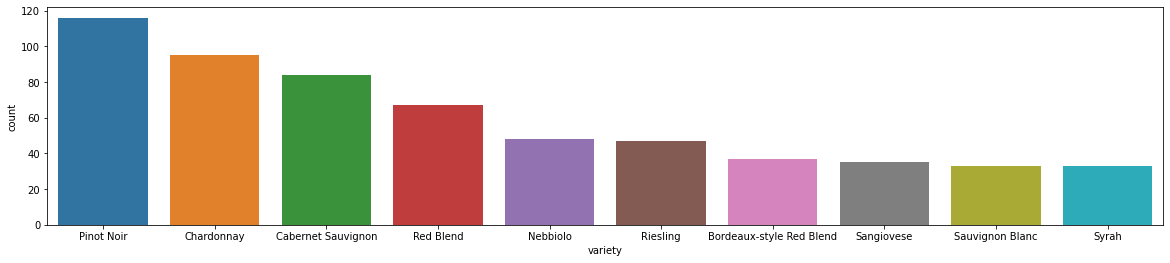

In [24]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="variety", data=df,order=df.variety.value_counts().iloc[:10].index,ax=ax)

## Spelling Checker

In [25]:

spell = SpellChecker()
for i in df['description']:
    #print(i)
    misspelled=spell.unknown(i)
    print(misspelled)

{'p', 't', 'v', 'w', 'k', 's', 'h', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'd', 'b', 'g'}
{'p', 'c', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'z', 'f', 'l', 'd', 'h', 'k', 'x', 't', 'w'}
{'p', 'c', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'z', 'f', 'l', 'd', 'h', 'k', 'x', 't', 'w'}
{'p', 'c', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'é', 'f', 'l', 'd', 'â', 'h', 'k', 'x', 't', 'w'}
{'p', 't', 'v', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'x', 'd', 'b', 'g'}
{'p', 'v', 'd', 'h', 'k', 's', 'w', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'x', 't', 'b', 'g'}
{'p', 'c', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'z', 'f', 'l', 'd', 'h', 'k', 'x', 't', 'w'}
{'p', 'c', 'j', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'f', 'l', 'd', 'h', 'k', 'q', 'x', 't', 'w'}
{'p', 'c', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'f', 'l', 'd', 'h', 'k', 'x', 't', 'w', '—'}
{'p', 'c', 'j', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'f', 'l', 'd', 'h', 'k', 'x', 't', 'w'}
{'t', 'p', 'v', 'h', 'w', 's', 'k', 'n', 'r', 'c',

{'p', 'v', 'd', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', 'c', 'j', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'z', 'f', 'l', 'd', 'h', 'k', 't', 'w'}
{'p', 't', 'v', 'h', 'k', 's', 'w', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'd', 'b', 'g'}
{'p', 'v', 'd', 'h', 'k', 's', 'w', 'n', 'r', 'c', 'z', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', 'v', 'd', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'z', 'f', 'l', ' ', 'm', 'x', 't', 'g'}
{'p', 'd', 'h', 'k', 's', 'w', 'n', 'r', 'c', 'j', 'f', 'l', ' ', 'm', 't', 'b'}
{'p', 'v', 'd', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', '“', 'c', 'j', ' ', 'm', 'b', 'g', 'v', '”', 's', 'n', 'r', 'é', 'f', 'l', 'd', 'h', 't', 'w', '—'}
{'p', 'd', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'x', 't', 'b', 'g'}
{'p', 'd', 'w', 'h', 's', 'n', 'c', 'r', 'z', 'j', 'f', 'l', ' ', 'm', 'x', 't', 'b', 'g'}
{'p', 'v', 'd', 'w', 'h', 's', 'n', 'c', 'r', 'z', 'q', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', 'd'

{'p', 'd', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', 't', 'v', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'x', 'd', 'b', 'g'}
{'p', 't', 'v', 'h', 'k', 's', 'w', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'd', 'b', 'g'}
{'t', 'p', 'v', 'h', 'w', 's', 'n', 'c', 'r', 'f', 'l', ' ', 'm', 'x', 'd', 'b', 'g'}
{'p', 'v', 'd', 'h', 'k', 's', 'w', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', 'v', 'd', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'j', 'f', 'l', ' ', 'm', 'x', 't', 'g'}
{'p', 'c', 'j', ' ', 'm', 'b', 'g', '–', 'v', 's', 'n', 'r', 'f', 'l', 'd', 'h', 'k', 't', 'w'}
{'p', 'c', 'j', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'f', 'l', 'd', 'h', 'k', 'x', 't', 'w'}
{'p', 't', 'v', 'h', 'k', 's', 'w', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'd', 'b', 'g'}
{'p', '“', 'c', ' ', 'm', 'b', 'g', 'v', '”', 's', 'n', 'r', 'f', 'l', 'd', 'h', 'k', 't', 'w'}
{'p', 't', 'v', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'x', 'd', 'b', 'g'}
{'t', 'p', 'v'

{'p', 'v', 'd', 'h', 'w', 's', 'n', 'c', 'r', 'f', 'l', ' ', 'm', 'x', 't', 'b', 'g'}
{'p', 'v', 'd', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', 'v', 'd', 'h', 'w', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', 'v', 'd', 'w', 'h', 's', 'k', 'n', 'r', 'c', 'j', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', 'c', ' ', 'm', 'b', 'g', 'v', 's', 'n', 'r', 'z', 'f', 'l', 'd', 'h', 'k', 'q', 'x', 't', 'w'}
{'t', 'p', 'v', 'h', 'k', 's', 'w', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'x', 'd', 'b', 'g'}
{'p', 'd', 'w', 'k', 's', 'h', 'n', 'r', 'c', 'j', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'p', 'v', 'd', 'w', 'h', 's', 'k', 'n', 'r', 'c', 'j', 'f', 'l', ' ', 'm', 't', 'b', 'g'}
{'t', 'p', 'v', 'w', 'h', 's', 'k', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'd', 'b', 'g'}
{'p', 't', 'v', 'h', 'w', 's', 'n', 'r', 'c', 'f', 'l', ' ', 'm', 'd', 'b', 'g'}
{'p', '“', 'c', ' ', 'm', 'b', 'g', 'v', '”', 's', 'n', 'r', 'f', 'l', 'd', 'h', 'k', 'q', 'x', 't', 'w'}
{'p', 'c'

## Sentiment Analysis - Data Preprocessing


In [26]:
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

def cleaner(comment):
    comment = re.sub("@[A-Za-z0-9]+","",comment) #Remove @ sign
    comment = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", comment) #Remove http links
    comment = re.sub(r'[^\w\s]','',comment)
    comment = comment.lower()
    comment = re.sub(r'\d+', '',comment) #remove numbers
    comment = " ".join(comment.split())
    comment = ''.join(c for c in comment if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    comment = comment.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    comment = " ".join(w for w in nltk.wordpunct_tokenize(comment) 
         if w.lower() in words or not w.isalpha())
    return comment
df['processed_description'] = df['description'].map(lambda x: cleaner(x))


[nltk_data] Downloading package words to C:\nltk_data...
[nltk_data]   Package words is already up-to-date!
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
#Lemmatize Words

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
df['lemmatised_content'] = df['processed_description'].apply(lambda x: lemmatizer(x))
df['lemmatised_content'] = df['lemmatised_content'].str.replace('-PRON-', '')
tokenizer = RegexpTokenizer(r'\w+')

df['final_content'] = df['lemmatised_content']


C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [28]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,category,processed_description,lemmatised_content,final_content
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,4,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,4,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,4,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,4,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,4,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Portugal,"This is a dry sparkling wine with tannins, spi...",Plexus Tinto,85,7.0,Tejo,NaN,NaN,Alicante Bouschet,Adega Cooperativa do Cartaxo,2,this is a dry sparkling wine with spice and be...,this be a dry sparkle wine with spice and berr...,this be a dry sparkle wine with spice and berr...
996,996,Portugal,"This is a soft, creamy wine with fruitiness an...",Blanc de Blancs Bruto,85,12.0,Beira Atlantico,NaN,NaN,Portuguese Sparkling,Adega de Cantanhede,2,this is a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...
997,997,France,This is a soft wine whose herbal character is ...,La Galope,85,15.0,Southwest France,Côtes de Gascogne,NaN,Sauvignon Blanc,Domaine de l'Herré,2,this is a soft wine whose herbal character is ...,this be a soft wine whose herbal character be ...,this be a soft wine whose herbal character be ...
998,998,France,This white wine is fruity and crisp with a del...,NaN,85,9.0,Southwest France,Côtes de Gascogne,NaN,White Blend,Domaine du Touja,2,this white wine is fruity and crisp with a del...,this white wine be fruity and crisp with a del...,this white wine be fruity and crisp with a del...


In [29]:
#df.to_csv('demo3.csv')

## Text Analysis using Flair

In [30]:
import flair
from flair.models import TextClassifier
from segtok.segmenter import split_single
from flair.data import Sentence

def make_sentences(text):
    """ Break apart text into a list of sentences """
    sentences = [sent for sent in split_single(text)]
    return sentences

def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
    return round(result, 3)

def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

In [31]:
classifier = TextClassifier.load('en-sentiment')

df['sentences'] = df.final_content.apply(make_sentences)
df['flair_scores'] = df.sentences.apply(get_scores)

2021-03-29 16:33:07,621 loading file C:\Users\YL\.flair\models\sentiment-en-mix-distillbert_3.1.pt


C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
df = df.drop(columns='sentences')

In [33]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,category,processed_description,lemmatised_content,final_content,flair_scores
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,4,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,[1.0]
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,4,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,[1.0]
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,4,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,[1.0]
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,4,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,[1.0]
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,4,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,[1.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Portugal,"This is a dry sparkling wine with tannins, spi...",Plexus Tinto,85,7.0,Tejo,NaN,NaN,Alicante Bouschet,Adega Cooperativa do Cartaxo,2,this is a dry sparkling wine with spice and be...,this be a dry sparkle wine with spice and berr...,this be a dry sparkle wine with spice and berr...,[-0.959]
996,996,Portugal,"This is a soft, creamy wine with fruitiness an...",Blanc de Blancs Bruto,85,12.0,Beira Atlantico,NaN,NaN,Portuguese Sparkling,Adega de Cantanhede,2,this is a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...,[1.0]
997,997,France,This is a soft wine whose herbal character is ...,La Galope,85,15.0,Southwest France,Côtes de Gascogne,NaN,Sauvignon Blanc,Domaine de l'Herré,2,this is a soft wine whose herbal character is ...,this be a soft wine whose herbal character be ...,this be a soft wine whose herbal character be ...,[0.999]
998,998,France,This white wine is fruity and crisp with a del...,NaN,85,9.0,Southwest France,Côtes de Gascogne,NaN,White Blend,Domaine du Touja,2,this white wine is fruity and crisp with a del...,this white wine be fruity and crisp with a del...,this white wine be fruity and crisp with a del...,[0.999]


In [34]:
df['flair_scores'] = [','.join(map(str, l)) for l in df['flair_scores']]
df["flair_scores"] = pd.to_numeric(df["flair_scores"], downcast="float")

In [35]:
conditions = [
(df['flair_scores'] >= 0.00),
(df['flair_scores'] < 0.00)
]

values = ['positive', 'negative']

df['flair_sentiment'] = np.select(conditions, values)

In [36]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,category,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,4,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,1.000,positive
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,4,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,1.000,positive
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,4,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,1.000,positive
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,4,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,1.000,positive
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,4,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,1.000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Portugal,"This is a dry sparkling wine with tannins, spi...",Plexus Tinto,85,7.0,Tejo,NaN,NaN,Alicante Bouschet,Adega Cooperativa do Cartaxo,2,this is a dry sparkling wine with spice and be...,this be a dry sparkle wine with spice and berr...,this be a dry sparkle wine with spice and berr...,-0.959,negative
996,996,Portugal,"This is a soft, creamy wine with fruitiness an...",Blanc de Blancs Bruto,85,12.0,Beira Atlantico,NaN,NaN,Portuguese Sparkling,Adega de Cantanhede,2,this is a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...,1.000,positive
997,997,France,This is a soft wine whose herbal character is ...,La Galope,85,15.0,Southwest France,Côtes de Gascogne,NaN,Sauvignon Blanc,Domaine de l'Herré,2,this is a soft wine whose herbal character is ...,this be a soft wine whose herbal character be ...,this be a soft wine whose herbal character be ...,0.999,positive
998,998,France,This white wine is fruity and crisp with a del...,NaN,85,9.0,Southwest France,Côtes de Gascogne,NaN,White Blend,Domaine du Touja,2,this white wine is fruity and crisp with a del...,this white wine be fruity and crisp with a del...,this white wine be fruity and crisp with a del...,0.999,positive


## Vader

In [37]:
sentiment_analyser = SentimentIntensityAnalyzer()

sentiments_vader = []

for i in df.final_content:
    sentiments_vader.append(sentiment_analyser.polarity_scores(i).get('compound'))
    
sentiments_vader = np.asarray(sentiments_vader)

df['sentiment_vader'] = pd.Series(data=sentiments_vader)
df = df.reset_index(drop=True)

In [38]:
conditions = [
    (df['sentiment_vader'] >= 0.00),
     (df['sentiment_vader'] < 0.00)
    ]

values = ['positive', 'negative']

df['vader'] = np.select(conditions, values)

df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,category,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,4,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,1.000,positive,0.6115,positive
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,4,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,1.000,positive,0.2023,positive
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,4,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,1.000,positive,0.6124,positive
3,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,4,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,1.000,positive,0.4678,positive
4,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,4,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,1.000,positive,0.8659,positive
5,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos,4,slightly gritty include a sweet note of pastry...,slightly gritty include a sweet note of pastry...,slightly gritty include a sweet note of pastry...,0.974,positive,0.6486,positive
6,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,4,lush cedary are luxe and offer of marzipan and...,lush cedary be luxe and offer of marzipan and ...,lush cedary be luxe and offer of marzipan and ...,0.998,positive,0.4005,positive
7,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,4,this vineyard was formerly bottled as find str...,this vineyard be formerly bottle as find strik...,this vineyard be formerly bottle as find strik...,0.962,positive,0.5994,positive
8,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,4,the producer from two of the vineyard for this...,the producer from two of the vineyard for this...,the producer from two of the vineyard for this...,1.000,positive,0.9366,positive
9,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio,4,elegance complexity and structure come togethe...,elegance complexity and structure come togethe...,elegance complexity and structure come togethe...,1.000,positive,0.5719,positive


## Textblob

In [39]:
from textblob import TextBlob

sentiments_textblob = []

for review in df.final_content:
    review = TextBlob(review)
    sentiments_textblob.append(review.sentiment.polarity)

sentiments_textblob = np.asarray(sentiments_textblob)   

df['sentiment_textblob'] = pd.Series(data=sentiments_textblob)
df= df.reset_index(drop=True)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,category,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,4,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,1.0,positive,0.6115,positive,0.331667
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,4,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,1.0,positive,0.2023,positive,0.137500
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,4,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,1.0,positive,0.6124,positive,0.167273
3,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,4,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,1.0,positive,0.4678,positive,0.100741
4,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia,4,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,1.0,positive,0.8659,positive,0.146032


In [40]:
conditions = [
    (df['sentiment_textblob'] > 0),
    (df['sentiment_textblob'] < 0)
    ]

values = ['positive', 'negative']

df['textblob'] = np.select(conditions, values)

df.head(50)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,...,category,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,...,4,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,1.000,positive,0.6115,positive,3.316667e-01,positive
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,...,4,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,1.000,positive,0.2023,positive,1.375000e-01,positive
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,...,4,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,1.000,positive,0.6124,positive,1.672727e-01,positive
3,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,...,4,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,1.000,positive,0.4678,positive,1.007407e-01,positive
4,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,...,4,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,1.000,positive,0.8659,positive,1.460317e-01,positive
5,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,...,4,slightly gritty include a sweet note of pastry...,slightly gritty include a sweet note of pastry...,slightly gritty include a sweet note of pastry...,0.974,positive,0.6486,positive,4.200000e-01,positive
6,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,...,4,lush cedary are luxe and offer of marzipan and...,lush cedary be luxe and offer of marzipan and ...,lush cedary be luxe and offer of marzipan and ...,0.998,positive,0.4005,positive,4.047619e-02,positive
7,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,...,4,this vineyard was formerly bottled as find str...,this vineyard be formerly bottle as find strik...,this vineyard be formerly bottle as find strik...,0.962,positive,0.5994,positive,2.500000e-01,positive
8,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,...,4,the producer from two of the vineyard for this...,the producer from two of the vineyard for this...,the producer from two of the vineyard for this...,1.000,positive,0.9366,positive,2.120000e-01,positive
9,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,...,4,elegance complexity and structure come togethe...,elegance complexity and structure come togethe...,elegance complexity and structure come togethe...,1.000,positive,0.5719,positive,2.571429e-01,positive


In [41]:
df['final_sentiment']=''
for data in range(0,len(df)):
    lst1 = []
    flair = df['flair_sentiment'][data]
    vader = df['vader'][data]
    textblob = df['textblob'][data]
    lst1.append(flair)
    if vader in lst1:
        df['final_sentiment'][data] = vader
    else:
        lst1.append(vader)
        if textblob in lst1:
            df['final_sentiment'][data] = textblob
        else:
            df['final_sentiment'][data] = ('unknown')
            

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


## accuracy counter


In [42]:
flair_counter = 0
vader_counter = 0
textblob_counter = 0

for data in range(0,len(df)):
    if df['flair_sentiment'][data] == df['final_sentiment'][data]:
        flair_counter = flair_counter + 1
    if df['vader'][data] == df['final_sentiment'][data]:
        vader_counter = vader_counter + 1
    if df['textblob'][data] == df['final_sentiment'][data]:
        textblob_counter = textblob_counter + 1

In [43]:
print(len(df))

999


In [44]:
print(flair_counter)
print(vader_counter)
print(textblob_counter)

927
915
828


In [45]:
print ("Accuracy for Flair is:", round((flair_counter/len(df))*100,2), "%" )
print ("Accuracy for Vader is:", round((vader_counter/len(df))*100,2), "%" )
print ("Accuracy for Textblob is:", round((textblob_counter/len(df))*100,2), "%" )

Accuracy for Flair is: 92.79 %
Accuracy for Vader is: 91.59 %
Accuracy for Textblob is: 82.88 %


## Visualisation of different categories and their sentiment polarity

In [46]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,...,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob,final_sentiment
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,...,ripe of fig blackberry and cassis are and by a...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,1.000,positive,0.6115,positive,0.331667,positive,positive
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,...,mac the memory of a wine once made by his moth...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,1.000,positive,0.2023,positive,0.137500,positive,positive
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,...,this spent in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,1.000,positive,0.6124,positive,0.167273,positive,positive
3,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,...,this is the top wine from la after the highest...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,1.000,positive,0.4678,positive,0.100741,positive,positive
4,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,1.000,positive,0.8659,positive,0.146032,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Portugal,"This is a dry sparkling wine with tannins, spi...",Plexus Tinto,85,7.0,Tejo,NaN,NaN,Alicante Bouschet,...,this is a dry sparkling wine with spice and be...,this be a dry sparkle wine with spice and berr...,this be a dry sparkle wine with spice and berr...,-0.959,negative,0.3612,positive,0.327083,positive,positive
995,996,Portugal,"This is a soft, creamy wine with fruitiness an...",Blanc de Blancs Bruto,85,12.0,Beira Atlantico,NaN,NaN,Portuguese Sparkling,...,this is a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...,1.000,positive,0.7783,positive,0.150000,positive,positive
996,997,France,This is a soft wine whose herbal character is ...,La Galope,85,15.0,Southwest France,Côtes de Gascogne,NaN,Sauvignon Blanc,...,this is a soft wine whose herbal character is ...,this be a soft wine whose herbal character be ...,this be a soft wine whose herbal character be ...,0.999,positive,0.5719,positive,0.308333,positive,positive
997,998,France,This white wine is fruity and crisp with a del...,NaN,85,9.0,Southwest France,Côtes de Gascogne,NaN,White Blend,...,this white wine is fruity and crisp with a del...,this white wine be fruity and crisp with a del...,this white wine be fruity and crisp with a del...,0.999,positive,0.5859,positive,0.270000,positive,positive


In [49]:
#df.to_csv('demo30.csv')

## Finding top N-Words in the data and filter them out 

In [50]:
findtopwords = df['lemmatised_content']
findtopwords

0      ripe of fig blackberry and cassis be and by a ...
1      mac the memory of a wine once make by  mother ...
2      this spend in new oak and fruit from aurora an...
3      this be the top wine from la after the high po...
4      deep dense and pure from the opening bell this...
                             ...                        
994    this be a dry sparkle wine with spice and berr...
995    this be a soft creamy wine with fruitiness and...
996    this be a soft wine whose herbal character be ...
997    this white wine be fruity and crisp with a del...
998    dusty plum and berry be clean in the mouth thi...
Name: lemmatised_content, Length: 999, dtype: object

In [51]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['lemmatised_content']), axis=1)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,...,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob,final_sentiment,tokenized_sents
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,1.000,positive,0.6115,positive,0.331667,positive,positive,"[ripe, of, fig, blackberry, and, cassis, be, a..."
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,1.000,positive,0.2023,positive,0.137500,positive,positive,"[mac, the, memory, of, a, wine, once, make, by..."
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,1.000,positive,0.6124,positive,0.167273,positive,positive,"[this, spend, in, new, oak, and, fruit, from, ..."
3,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,1.000,positive,0.4678,positive,0.100741,positive,positive,"[this, be, the, top, wine, from, la, after, th..."
4,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,1.000,positive,0.8659,positive,0.146032,positive,positive,"[deep, dense, and, pure, from, the, opening, b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Portugal,"This is a dry sparkling wine with tannins, spi...",Plexus Tinto,85,7.0,Tejo,NaN,NaN,Alicante Bouschet,...,this be a dry sparkle wine with spice and berr...,this be a dry sparkle wine with spice and berr...,-0.959,negative,0.3612,positive,0.327083,positive,positive,"[this, be, a, dry, sparkle, wine, with, spice,..."
995,996,Portugal,"This is a soft, creamy wine with fruitiness an...",Blanc de Blancs Bruto,85,12.0,Beira Atlantico,NaN,NaN,Portuguese Sparkling,...,this be a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...,1.000,positive,0.7783,positive,0.150000,positive,positive,"[this, be, a, soft, creamy, wine, with, fruiti..."
996,997,France,This is a soft wine whose herbal character is ...,La Galope,85,15.0,Southwest France,Côtes de Gascogne,NaN,Sauvignon Blanc,...,this be a soft wine whose herbal character be ...,this be a soft wine whose herbal character be ...,0.999,positive,0.5719,positive,0.308333,positive,positive,"[this, be, a, soft, wine, whose, herbal, chara..."
997,998,France,This white wine is fruity and crisp with a del...,NaN,85,9.0,Southwest France,Côtes de Gascogne,NaN,White Blend,...,this white wine be fruity and crisp with a del...,this white wine be fruity and crisp with a del...,0.999,positive,0.5859,positive,0.270000,positive,positive,"[this, white, wine, be, fruity, and, crisp, wi..."


In [52]:
data = []
for line in df['tokenized_sents']:
    line = str(line)
    data_line = line.rstrip().split(',')
    data_line = line.rstrip().split(' ')
    for word in data_line:
        data.append(word)

        #remove punctuation in each word
data = [''.join(c for c in s if c not in string.punctuation) for s in data]
#print(data)
#remove empty strings
data = [s for s in data if s]
#print(data)

In [53]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    custom_words_rm = ['']
    final_words = [w for w in words if w not in custom_words_rm]
    return final_words

finalone = remove_stopwords(data)
finalone

['ripe',
 'fig',
 'blackberry',
 'cassis',
 'oaky',
 'chocolate',
 'vanilla',
 'full',
 'layer',
 'intense',
 'cushion',
 'palate',
 'rich',
 'black',
 'bake',
 'toasty',
 'everlasting',
 'finish',
 'heady',
 'ideally',
 'balanced',
 'drink',
 'mac',
 'memory',
 'wine',
 'make',
 'mother',
 'tremendously',
 'delicious',
 'balanced',
 'complex',
 'white',
 'dark',
 'gold',
 'color',
 'hazelnut',
 'pear',
 'compote',
 'orange',
 'peel',
 'succulence',
 'residual',
 'sugar',
 'spend',
 'new',
 'oak',
 'fruit',
 'aurora',
 'madrona',
 'among',
 'aromatic',
 'dense',
 'toasty',
 'deftly',
 'toast',
 'cigar',
 'box',
 'blackberry',
 'black',
 'cherry',
 'coffee',
 'graphite',
 'polished',
 'fine',
 'sheen',
 'frame',
 'finish',
 'load',
 'dark',
 'chocolate',
 'drink',
 'top',
 'wine',
 'la',
 'high',
 'point',
 'vineyard',
 'structure',
 'density',
 'considerable',
 'acidity',
 'still',
 'wood',
 'wine',
 'extra',
 'richness',
 'concentration',
 'produce',
 'tari',
 'family',
 'formerly',
 

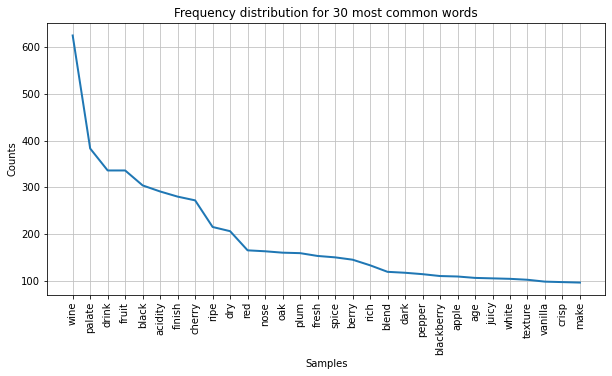

<AxesSubplot:title={'center':'Frequency distribution for 30 most common words'}, xlabel='Samples', ylabel='Counts'>

In [54]:
from nltk.probability import FreqDist
fdist = FreqDist(finalone)
plt.figure(figsize=(10, 5))
fdist.plot(30,title='Frequency distribution for 30 most common words')

In [55]:
tryout = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

In [56]:
topwordlist = []
extraction = tryout[:30] #extract top 30 words
for word,count in extraction:
    print (word,count)
    if word not in topwordlist:
        topwordlist.append(word)

wine 625
palate 383
drink 336
fruit 336
black 304
acidity 291
finish 280
cherry 272
ripe 215
dry 206
red 165
nose 163
oak 160
plum 159
fresh 153
spice 150
berry 145
rich 133
blend 119
dark 117
pepper 114
blackberry 110
apple 109
age 106
juicy 105
white 104
texture 102
vanilla 98
crisp 97
make 96


## Remove Stopwords

In [58]:
#remove stop words
stop = topwordlist
df.stemming_content = df.final_content.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,...,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob,final_sentiment,tokenized_sents
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,...,ripe of fig blackberry and cassis be and by a ...,ripe of fig blackberry and cassis be and by a ...,1.000,positive,0.6115,positive,0.331667,positive,positive,"[ripe, of, fig, blackberry, and, cassis, be, a..."
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,...,mac the memory of a wine once make by mother ...,mac the memory of a wine once make by mother ...,1.000,positive,0.2023,positive,0.137500,positive,positive,"[mac, the, memory, of, a, wine, once, make, by..."
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,...,this spend in new oak and fruit from aurora an...,this spend in new oak and fruit from aurora an...,1.000,positive,0.6124,positive,0.167273,positive,positive,"[this, spend, in, new, oak, and, fruit, from, ..."
3,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,...,this be the top wine from la after the high po...,this be the top wine from la after the high po...,1.000,positive,0.4678,positive,0.100741,positive,positive,"[this, be, the, top, wine, from, la, after, th..."
4,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,...,deep dense and pure from the opening bell this...,deep dense and pure from the opening bell this...,1.000,positive,0.8659,positive,0.146032,positive,positive,"[deep, dense, and, pure, from, the, opening, b..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Portugal,"This is a dry sparkling wine with tannins, spi...",Plexus Tinto,85,7.0,Tejo,NaN,NaN,Alicante Bouschet,...,this be a dry sparkle wine with spice and berr...,this be a dry sparkle wine with spice and berr...,-0.959,negative,0.3612,positive,0.327083,positive,positive,"[this, be, a, dry, sparkle, wine, with, spice,..."
995,996,Portugal,"This is a soft, creamy wine with fruitiness an...",Blanc de Blancs Bruto,85,12.0,Beira Atlantico,NaN,NaN,Portuguese Sparkling,...,this be a soft creamy wine with fruitiness and...,this be a soft creamy wine with fruitiness and...,1.000,positive,0.7783,positive,0.150000,positive,positive,"[this, be, a, soft, creamy, wine, with, fruiti..."
996,997,France,This is a soft wine whose herbal character is ...,La Galope,85,15.0,Southwest France,Côtes de Gascogne,NaN,Sauvignon Blanc,...,this be a soft wine whose herbal character be ...,this be a soft wine whose herbal character be ...,0.999,positive,0.5719,positive,0.308333,positive,positive,"[this, be, a, soft, wine, whose, herbal, chara..."
997,998,France,This white wine is fruity and crisp with a del...,NaN,85,9.0,Southwest France,Côtes de Gascogne,NaN,White Blend,...,this white wine be fruity and crisp with a del...,this white wine be fruity and crisp with a del...,0.999,positive,0.5859,positive,0.270000,positive,positive,"[this, white, wine, be, fruity, and, crisp, wi..."


## Grouping them into different categories

In [60]:
#df_group1 = df.groupby(['category'])
grouped = df.groupby(df.category)

In [66]:
if df['category']==4

count     999
unique      3
top         3
freq      605
Name: category, dtype: object

In [62]:
#df_group1 = grouped.get_group('1')
df_group2 = grouped.get_group('2')
df_group3 = grouped.get_group('3')
df_group4 = grouped.get_group('4')

In [ ]:
df_group1 = df_group1[~df_group1.final_sentiment.str.contains("unknown", na=False)]
df_group2 = df_group2[~df_group2.final_sentiment.str.contains("unknown", na=False)]
df_group3 = df_group3[~df_group3.final_sentiment.str.contains("unknown", na=False)]
df_group4 = df_group4[~df_group4.final_sentiment.str.contains("unknown", na=False)]

In [ ]:
sentiment_grouped_1 = df_group1.groupby(df.final_sentiment)
sentiment_grouped_2 = df_group2.groupby(df.final_sentiment)
sentiment_grouped_3 = df_group3.groupby(df.final_sentiment)
sentiment_grouped_4 = df_group4.groupby(df.final_sentiment)

In [ ]:
df_group1_pos = sentiment_grouped_1.get_group('positive')
df_group1_neg = sentiment_grouped_1.get_group('negative')
df_group2_pos = sentiment_grouped_2.get_group('positive')
df_group2_neg = sentiment_grouped_2.get_group('negative')
df_group3_pos = sentiment_grouped_3.get_group('positive')
df_group3_neg = sentiment_grouped_3.get_group('negative')
df_group4_pos = sentiment_grouped_4.get_group('positive')
df_group4_neg = sentiment_grouped_4.get_group('negative')

## Positive attributes from Group 1

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot( counts, x_pos,palette='husl',orient = "h")
    plt.yticks(x_pos, words) 
    plt.ylabel('words')
    plt.xlabel('counts')
    plt.show()
    return words

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(min_df =1,max_df=3000,stop_words='english')

In [ ]:
cat1pos = ''
if len(df_group1_pos)>0:
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(df_group1_pos['stemming_content'])

    # Visualise the 20 most common words
    top_n_words_group1_pos = plot_20_most_common_words(count_data, count_vectorizer)
    
    for i in top_n_words_group1_pos:
        if top_n_words_group1_pos[-1] == i:
            cat1pos += i
            break
        cat1pos += i + ","
else:
    print("No Data")

## Negative attributes from Group 1

In [ ]:
cat1neg = ''
if len(df_group1_neg)>0:
    # Fit and transform the processed titles
    count_data1 = count_vectorizer.fit_transform(df_group1_neg['stemming_content'])

    # Visualise the 20 most common words
    top_n_words_group1_neg = plot_20_most_common_words(count_data1, count_vectorizer)
    
    for i in top_n_words_group1_neg:
    if top_n_words_group1_neg[-1] == i:
        cat1neg += i
        break
    cat1neg += i + ","
else:
    print("No Data")

## Positive attributes from Group 2

In [ ]:
cat2pos = ''
if len(df_group2_pos)>0:
    # Fit and transform the processed titles
    count_data2 = count_vectorizer.fit_transform(df_group2_pos['stemming_content'])

    # Visualise the 20 most common words
    top_n_words_group2_pos = plot_20_most_common_words(count_data2, count_vectorizer)
    
    for i in top_n_words_group2_pos:
    if top_n_words_group2_pos[-1] == i:
        cat2pos += i
        break
    cat2pos += i + ","
else:
    print("No Data")

## Negative attributes from Group 2


In [ ]:
cat2neg = ''
if len(df_group2_neg)>0:
    # Fit and transform the processed titles
    count_data3 = count_vectorizer.fit_transform(df_group2_neg['stemming_content'])

    # Visualise the 20 most common words
    top_n_words_group2_neg = plot_20_most_common_words(count_data3, count_vectorizer)
    
    for i in top_n_words_group2_neg:
    if top_n_words_group2_neg[-1] == i:
        cat2neg += i
        break
    cat2neg += i + ","
else:
    print("No Data")

## Positive attributes from Group 3

In [ ]:
cat3pos = ''
if len(df_group3_pos)>0:
    # Fit and transform the processed titles
    count_data4 = count_vectorizer.fit_transform(df_group3_pos['stemming_content'])

    # Visualise the 20 most common words
    top_n_words_group3_pos = plot_20_most_common_words(count_data4, count_vectorizer)
    
    for i in top_n_words_group3_pos:
    if top_n_words_group3_pos[-1] == i:
        cat3pos += i
        break
    cat3pos += i + ","
else:
    print("No Data")

## Negative attributes from Group 3


In [ ]:
cat3neg = ''
if len(df_group3_neg)>0:
    # Fit and transform the processed titles
    count_data5 = count_vectorizer.fit_transform(df_group3_neg['stemming_content'])

    # Visualise the 20 most common words
    top_n_words_group3_neg = plot_20_most_common_words(count_data5, count_vectorizer)
    
    for i in top_n_words_group3_neg:
    if top_n_words_group3_neg[-1] == i:
        cat3neg += i
        break
    cat3neg += i + ","
else:
    print("No Data")

## Positive attributes from Group 4

In [ ]:
cat4pos = ''
if len(df_group4_pos)>0:
    # Fit and transform the processed titles
    count_data6 = count_vectorizer.fit_transform(df_group4_pos['stemming_content'])

    # Visualise the 20 most common words
    top_n_words_group4_pos = plot_20_most_common_words(count_data6, count_vectorizer)
    
    for i in top_n_words_group4_pos:
    if top_n_words_group4_pos[-1] == i:
        cat4pos += i
        break
    cat4pos += i + ","
else:
    print("No Data")

## Negative attributes from Group 4

In [ ]:
cat4neg = ''
if len(df_group4_neg)>0:
    # Fit and transform the processed titles
    count_data7 = count_vectorizer.fit_transform(df_group4_neg['stemming_content'])

    # Visualise the 20 most common words
    top_n_words_group4_neg = plot_20_most_common_words(count_data7, count_vectorizer)
    
    for i in top_n_words_group4_neg:
    if top_n_words_group4_neg[-1] == i:
        cat4neg += i
        break
    cat4neg += i + ","
    
else:
    print("No Data")

## Export Multiple Dataframe into a csv file

In [ ]:
import xlsxwriter 

#create excel
outWorkbook = xlsxwriter.Workbook("out1.xlsx")
outSheet = outWorkbook.add_worksheet()

#declare data 
outSheet.write("A1", "Categories")
outSheet.write("B1", "Words")

if len(cat1pos)>0:
    outSheet.write("A2", 'cat1pos')
    outSheet.write("B2", cat1pos)
else:
    outSheet.write("A2", 'cat1pos')
    outSheet.write("B2", 'No Data')
    
if len(cat1neg)>0:
    outSheet.write("A3", 'cat1neg')
    outSheet.write("B3", cat1neg)
else:
    outSheet.write("A3", 'cat1neg')
    outSheet.write("B3", 'No Data')

if len(cat2pos)>0: 
    outSheet.write("A4", 'cat2pos')
    outSheet.write("B4", cat2pos)
else:
    outSheet.write("A4", 'cat2pos')
    outSheet.write("B4", 'No Data')

if len(cat2neg)>0: 
    outSheet.write("A5", 'cat2neg')
    outSheet.write("B5", cat2neg)
else:
    outSheet.write("A5", 'cat2neg')
    outSheet.write("B5", 'No Data')    

if len(cat3pos)>0:
    outSheet.write("A6", 'cat3pos')
    outSheet.write("B6", cat3pos)
else:
    outSheet.write("A6", 'cat3pos')
    outSheet.write("B6", 'No Data')   

if len(cat3neg)>0:
    outSheet.write("A7", 'cat3neg')
    outSheet.write("B7", cat3neg)
else:
    outSheet.write("A7", 'cat3neg')
    outSheet.write("B7", 'No Data')    

if len(cat4pos)>0:
    outSheet.write("A8", 'cat4pos')
    outSheet.write("B8", cat4pos)
else:
    outSheet.write("A8", 'cat4pos')
    outSheet.write("B8", 'No Data')

if len(cat4neg)>0:
    outSheet.write("A9", 'cat4neg')
    outSheet.write("B9", cat4neg)
else:
    outSheet.write("A9", 'cat4neg')
    outSheet.write("B9", 'No Data')
outWorkbook.close()

## Recommendation for Business Owners

In [ ]:
import numpy as np
result = df.loc[np.logical_and(df['final_sentiment'] == "positive" , df['category'] == '2')]
result = result.loc[np.logical_and(df['country'] == "US" , df['price'] >= 100)]
result

In [ ]:
results = result.drop(columns=['province','variety'])
results = results[~results.final_sentiment.str.contains("unknown", na=False)]
results